## FORCE hackathon company network

Data is from [this blog post](https://agilescientific.com/blog/2018/9/27/force-ml-hackathon-project-round-up).

In [178]:
data = """
Cognite	AkerBP					
ESA	Kalkulo	NTNU	AkerBP			
Dig	RSI	Imperial	Equinor	DEA	Eni	Emerson
DTU	UiB	SLB	DEA	NPD		
Emerson	Kadme	COP	Accenture			
Equinor	CRC	XOM	Cegal			
Equinor	SLB	UiB	Cegal			
COP	Cegal	AkerBP				
COP	CapGemini					
"""

In [180]:
data = list(filter(None, [list(filter(None, d.split('\t'))) for d in data.split('\n')]))

In [181]:
data

[['Cognite', 'AkerBP'],
 ['ESA', 'Kalkulo', 'NTNU', 'AkerBP'],
 ['Dig', 'RSI', 'Imperial', 'Equinor', 'DEA', 'Eni', 'Emerson'],
 ['DTU', 'UiB', 'SLB', 'DEA', 'NPD'],
 ['Emerson', 'Kadme', 'COP', 'Accenture'],
 ['Equinor', 'CRC', 'XOM', 'Cegal'],
 ['Equinor', 'SLB', 'UiB', 'Cegal'],
 ['COP', 'Cegal', 'AkerBP'],
 ['COP', 'CapGemini']]

In [183]:
from itertools import combinations

edges = []
for d in data:
    combs = combinations(d, 2)
    edges += list(combs)

In [185]:
import networkx as nx

G = nx.Graph()

G.add_edges_from(edges)

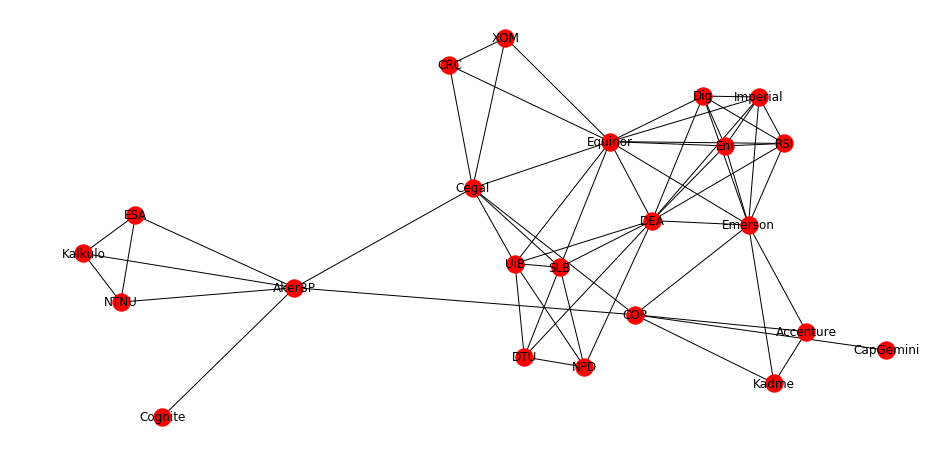

In [186]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
nx.draw(G, with_labels=True)

Counts of participants per organization:

In [ ]:
p = {
    "Cognite": 4,
    "AkerBP": 3,
    "ESA": 3,
    "Kalkulo": 1,
    "NTNU": 1,
    "Dig": 1,
    "RSI": 1,
    "Imperial": 1,
    "Equinor": 6,
    "DEA": 2,
    "Eni": 1,
    "Emerson": 2,
    "DTU": 1,
    "UiB": 2,
    "NPD": 1,
    "Kadme": 1,
    "COP": 5,
    "Accenture": 1,
    "CRC": 1,
    "XOM": 1,
    "Cegal": 5,
    "SLB": 2,
    "CapGemini": 5
}

Type of organization: 0 for government, 1 for operator, 2 for service, 3 for academic.

In [207]:
t = {
 'Accenture': 2,
 'AkerBP': 1,
 'COP': 1,
 'CRC': 1,
 'CapGemini': 2,
 'Cegal': 2,
 'Cognite': 2,
 'DEA': 1,
 'DTU': 3,
 'Dig': 2,
 'ESA': 2,
 'Emerson': 2,
 'Eni': 1,
 'Equinor': 1,
 'Imperial': 3,
 'Kadme': 2,
 'Kalkulo': 2,
 'NPD': 0,
 'NTNU': 3,
 'RSI': 2,
 'SLB': 2,
 'UiB': 3,
 'XOM': 1
}

In [189]:
colours = {
    0: 'lightgreen',
    1: 'turquoise',
    2: 'pink',
    3: 'deepskyblue'
}

In [190]:
t = {k:t[k] for k in list(p.keys())}

In [191]:
nx.set_node_attributes(G, p, 'participants')
nx.set_node_attributes(G, t, 'sector')

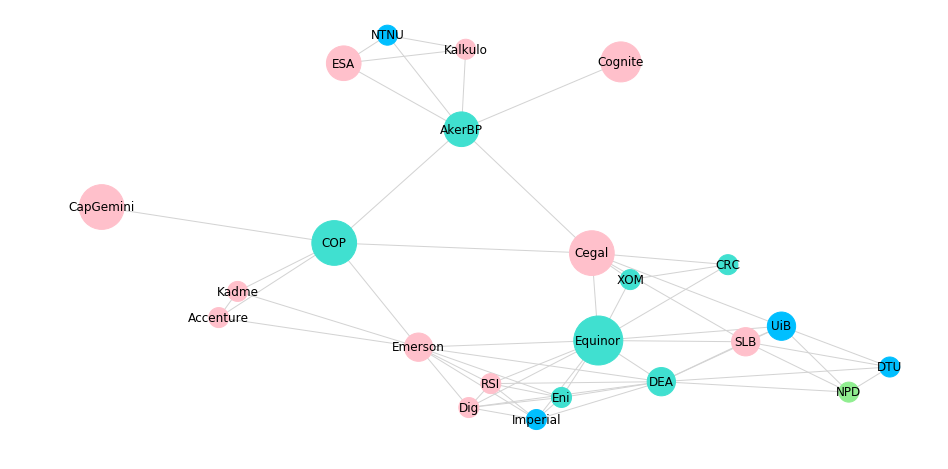

In [192]:
fig, ax = plt.subplots(figsize=(16,8))
nx.draw(G,
        with_labels=True,
        edge_color='lightgray',
        node_color=[colours[n] for n in t.values()],
        nodelist=list(p.keys()),
        node_size=400*np.array(list(p.values())),
       )

In [193]:
pos = nx.kamada_kawai_layout(G)

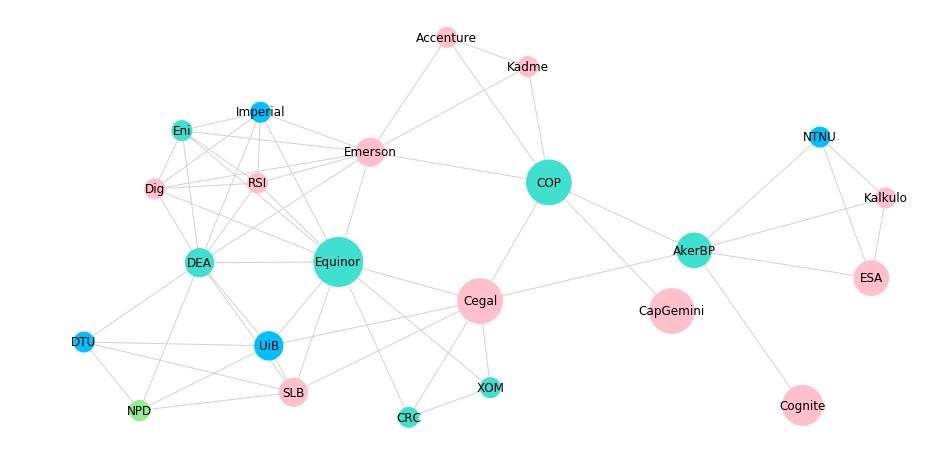

In [194]:
fig, ax = plt.subplots(figsize=(16,8))
nx.draw(G, pos,
        with_labels=True,
        node_color=[colours[n] for n in t.values()],
        edge_color='lightgray',
        nodelist=list(p.keys()),
        node_size=400*np.array(list(p.values())),
       )

In [205]:
pos = nx.spring_layout(G)

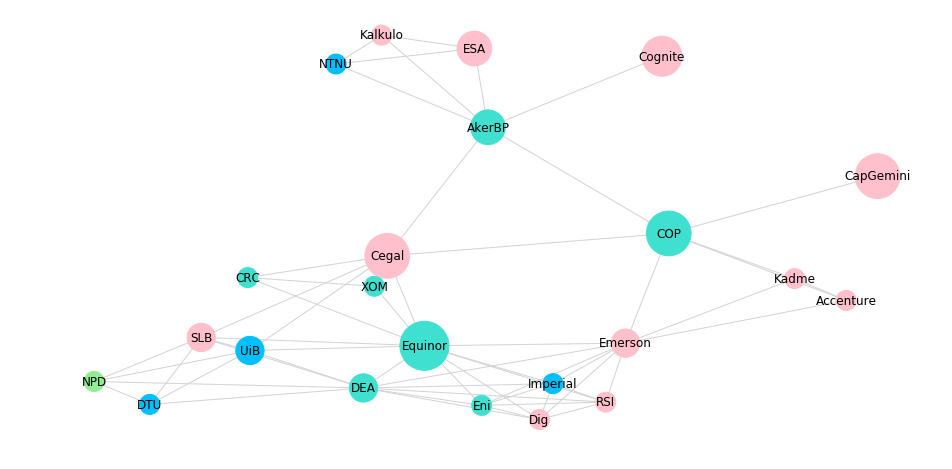

In [206]:
fig, ax = plt.subplots(figsize=(16,8))
nx.draw(G,
        pos,
        with_labels=True,
        node_color=[colours[n] for n in t.values()],
        edge_color='lightgray',
        nodelist=list(p.keys()),
        node_size=400*np.array(list(p.values())),
       )